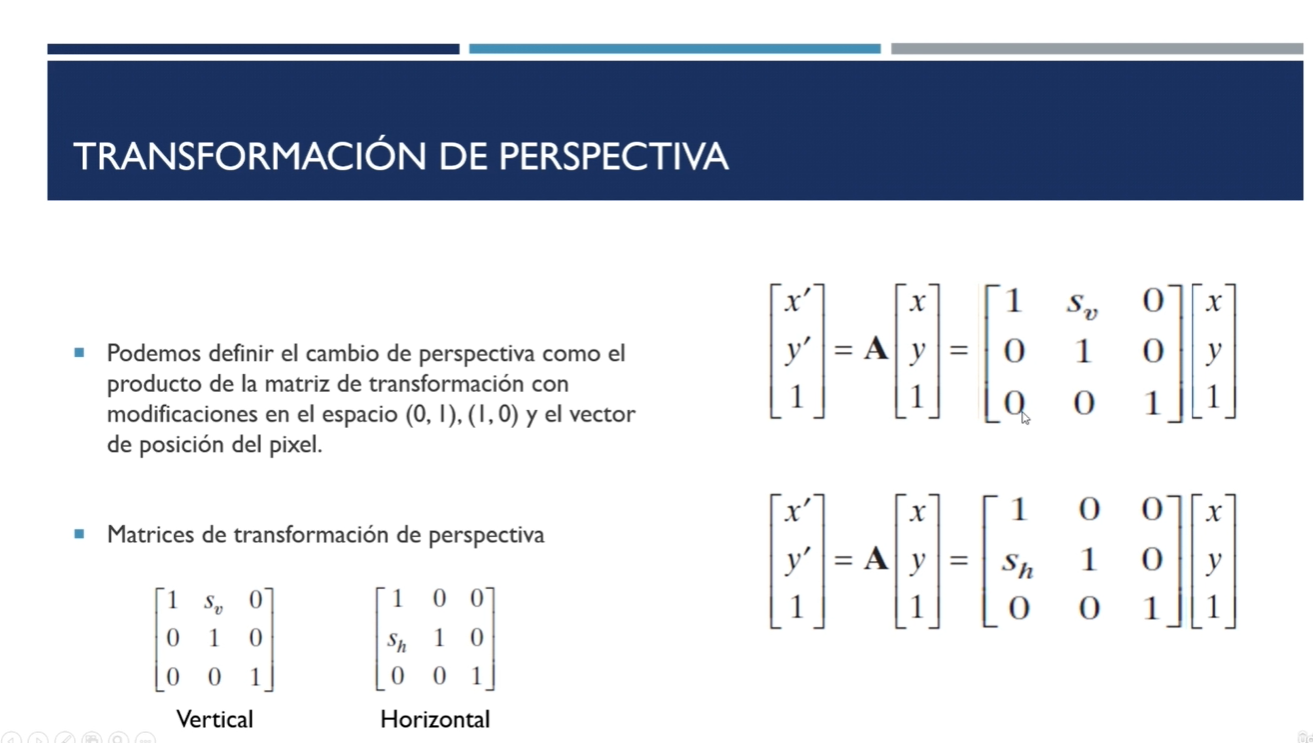

In [1]:
#importamos la libreria de opencv y matplotlib para poder visualizar la imagen correctamente
import cv2
import numpy as np
import matplotlib.pyplot as plt

La imagen se cargó correctamente.


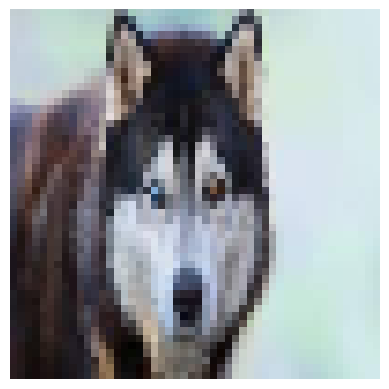

In [9]:
tMatrix=np.array([[1,0,0],[1,1,0],[0,1,1]])#construimos la matriz de transformación
mResultante=np.zeros((500,500,3),np.uint8)#construimos la matriz resultante

#leemos la imagen, se necesita poner la r delante de la dirección para que no se confunda en la ruta 
img = cv2.imread(r'C:\Users\joano\Desktop\vision artificial juan olivan\imagenes\perro.jpg')

# Verificar si la imagen se cargó correctamente
if img is None:
    print("Error: No se pudo cargar la imagen.")
else:
    print("La imagen se cargó correctamente.")

    
def mostrar_imagen(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Oculta los ejes
    plt.show()

img2=cv2.resize(img,(50,50))
alto,ancho,canales=img2.shape#obtenemos las dimensiones de la imagen
mostrar_imagen(img2)

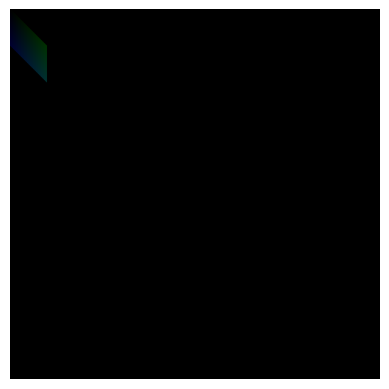

In [10]:
for i in range(alto):
    for j in range(ancho):
        pixel=[i,j,0]
        vectorPos=np.array([j,i,1])#construimos el vector posicion
        result=np.dot(tMatrix,vectorPos)#producto escalar
        x=result[0]
        y=result[1]
        mResultante[y,x]=pixel
        
mostrar_imagen(mResultante)   

*Ejemplo práctico*

La imagen se cargó correctamente.


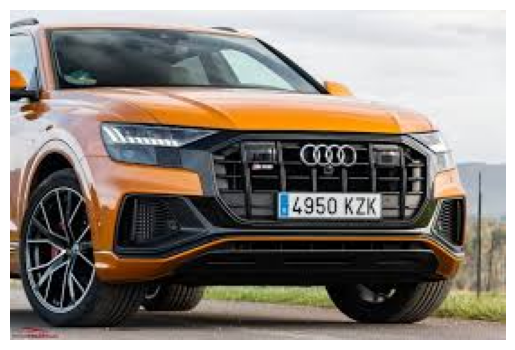

In [4]:
#vamos hacer un ejemplo práctico 
#leemos la imagen, se necesita poner la r delante de la dirección para que no se confunda en la ruta 
img = cv2.imread(r'C:\Users\joano\Desktop\vision artificial juan olivan\imagenes\tipos-matricula-coche.jpg')

# Verificar si la imagen se cargó correctamente
if img is None:
    print("Error: No se pudo cargar la imagen.")
else:
    print("La imagen se cargó correctamente.")

    
def mostrar_imagen(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Oculta los ejes
    plt.show()

#img2=cv2.resize(img,(200,100))
alto,ancho,canales=img.shape#obtenemos las dimensiones de la imagen
mostrar_imagen(img)

In [9]:
cv2.namedWindow("imagen1",cv2.WINDOW_NORMAL)#generamos una ventana 
global listaPuntos #variable global para que se pueda utilizar en las funciones y fuera de ellas
listaPuntos=[]#inicializamos la lista vacia
def obtenerPuntos(event,x,y,flags,params):#construimos la función para trabajar con cv2.setmousecall back
    if event==cv2.EVENT_LBUTTONDBLCLK:#leemos el evento resgitrado por el mouse 
    #si event es igual a doble click izquierdo agregamos las posiciones x,y a una lista y esa la lista la agergamos a listaPuntos
        listaPuntos.append([x,y])#agregamos los valores a listaPuntos


cv2.setMouseCallback("imagen1",obtenerPuntos)##utilizamos la funcion setmouseCallback para seleccionar con el click
cv2.imshow("imagen1",img)#mostramos la imagen en la ventana de imagen 1

while True:#generamos un ciclo while hasta darle a enter 
    if cv2.waitKey(0)==13:#si la tecl presionada es enter se ejecuta el bloque dentado 13 en ascii es enter 
        print(listaPuntos)#se imprimer la lista de puntos
        pts1=np.float32(listaPuntos)#convertimos la lista en un float32,obtenemos los puntos de las esquinas del objeto que queremos trasnformar 
        #puntos seleccionados de la imagen a transformar, seleccionados por el mouse 
        pts2=np.float32([[0,0],[ancho,0],[0,alto],[ancho,alto]])#definimos los puntos donde debe de quedar la imagen transformada 
        M=cv2.getPerspectiveTransform(pts1,pts2)#obtenemos la matriz de transformación de perspectiva 
        resultadoImagen=cv2.warpPerspective(img,M,(alto,ancho))#es la función escalar del vector de posición por la matriz de transformación
        cv2.imshow("imagen1", resultadoImagen)
    if cv2.waitKey(0)==27:#si se presiona escape rompemos el ciclo while
        break
cv2.destroyAllWindows()

[[109, 99], [240, 96], [125, 124], [261, 128]]
